## Observations and Insights 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
total_mice = len(combined_data['Mouse ID'])
print(f'There is a total of {total_mice} mice.')

There is a total of 1893 mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data[['Mouse ID', 'Timepoint']].value_counts()


Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
                      ..
q610      30           1
          35           1
q633      0            1
          5            1
a203      0            1
Length: 1888, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data['Mouse ID'].value_counts()


g989    13
x581    10
g791    10
w350    10
e662    10
        ..
d133     1
l872     1
h428     1
f932     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_mice = combined_data.drop_duplicates(subset = ['Mouse ID'])
unique_mice = len(drop_mice['Mouse ID'])

In [6]:
# Checking the number of mice in the clean DataFrame.
print(f'There is a total of {unique_mice} unique mice.')

There is a total of 249 unique mice.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mice_group_drug = combined_data.groupby('Drug Regimen')
mice_group_count = mice_group_drug['Drug Regimen'].count()
mice_drug_mean = mice_group_drug['Tumor Volume (mm3)'].mean()
mice_drug_median = mice_group_drug['Tumor Volume (mm3)'].median()
mice_drug_tumor = mice_group_drug['Tumor Volume (mm3)'].value_counts()
mice_drug_var = mice_group_drug['Tumor Volume (mm3)'].var()
mice_drug_std = mice_group_drug['Tumor Volume (mm3)'].std()
mice_drug_sem = mice_group_drug['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
new_mice_df = pd.DataFrame({'Drug Regimen':mice_group_count,'Mean':mice_drug_mean, 'Median':mice_drug_median, 
                            'Variance':mice_drug_var,'Standard Deviation':mice_drug_std, 'SEM':mice_drug_sem})
new_mice_df

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mice_group_drug_tumor = mice_group_drug['Tumor Volume (mm3)']
# Using the aggregation method, produce the same summary statistics in a single line
mice_group_drug_tumor.agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total Mice')

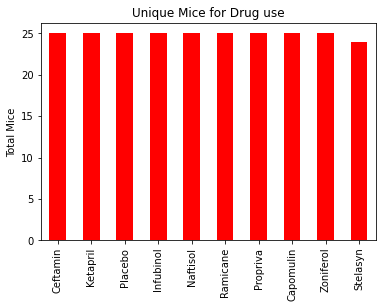

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_drug = drop_mice['Drug Regimen'].value_counts()
mice_drug.plot(kind="bar", facecolor="red")
plt.title('Unique Mice for Drug use')
plt.ylabel('Total Mice')

<Figure size 720x1800 with 0 Axes>

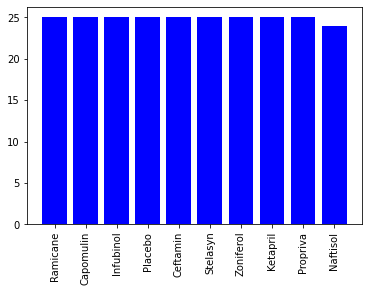

<Figure size 720x1800 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(mice_drug))
mice_drug1 = drop_mice['Drug Regimen'].unique()
tick_locations = [value+0.0 for value in x_axis]
plt.bar(x_axis, mice_drug, color="b", align="center")
plt.xticks(tick_locations, mice_drug1, rotation="vertical")
plt.figure(figsize=(10,25))


<AxesSubplot:ylabel='Sex'>

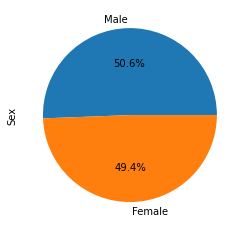

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_drug = combined_data['Sex'].value_counts()
mice_drug.plot(kind="pie", autopct="%1.1f%%")


(-1.109752519617764,
 1.1251534837968824,
 -1.1101268549061045,
 1.1220885671018512)

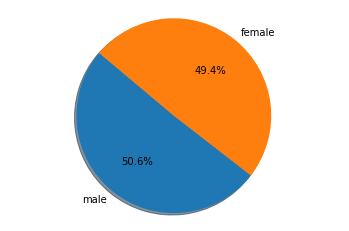

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= ['male', 'female']
plt.pie(mice_drug, labels=labels, 
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mice_group_drug = combined_data.groupby('Drug Regimen')
mice_group_count = mice_group_drug['Drug Regimen'].count()
mice_group_final = mice_group_drug['Tumor Volume (mm3)'].min()
# Start by getting the last (greatest) timepoint for each mouse
mice_group_maxtime = mice_group_drug['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_mice_df2 = pd.merge(combined_data, mice_group_final)
new_mice_df3 = pd.merge(new_mice_df2, mice_group_maxtime)
new_mice_df3

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,k403,Ramicane,Male,21,16,45,22.050126,1
2,k403,Ramicane,Male,21,16,45,22.050126,1
3,k403,Ramicane,Male,21,16,45,22.050126,1
4,k403,Ramicane,Male,21,16,45,22.050126,1
5,k403,Ramicane,Male,21,16,45,22.050126,1
6,k403,Ramicane,Male,21,16,45,22.050126,1
7,k403,Ramicane,Male,21,16,45,22.050126,1
8,k403,Ramicane,Male,21,16,45,22.050126,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
quartiles = combined_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.


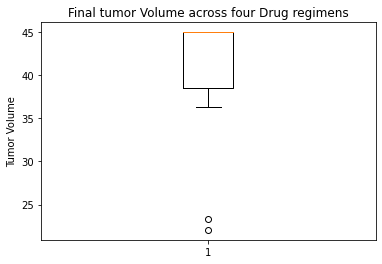

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor Volume across four Drug regimens')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(mice_group_final)
plt.show()

## Line and Scatter Plots

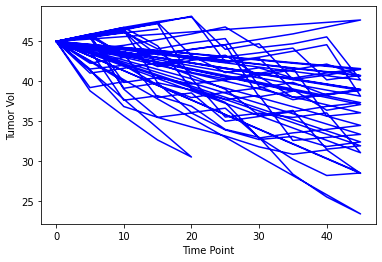

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = combined_data[(combined_data['Drug Regimen'] == 'Capomulin')]
tumor_vol = capomulin_data['Tumor Volume (mm3)']
time_point = capomulin_data['Timepoint']
plt.xlabel("Time Point")
plt.ylabel("Tumor Vol")
plt.plot(time_point, tumor_vol, color='blue')
plt.show()

Text(0, 0.5, 'Tumor Vol')

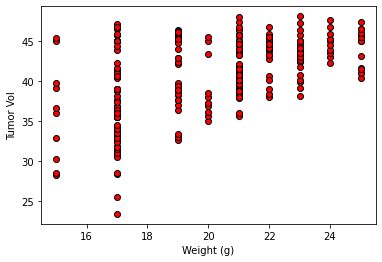

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight = capomulin_data['Weight (g)']
cap_avg = capomulin_data['Tumor Volume (mm3)']
plt.scatter(weight, cap_avg, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Vol")

## Correlation and Regression

Text(18, 30, 'y = 0.96x + 21.49')

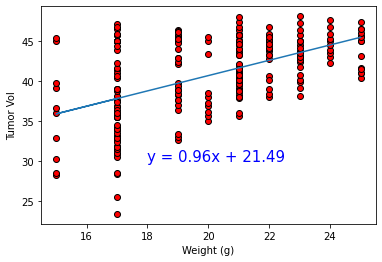

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r, p, se = stats.linregress(weight, cap_avg)
res = stats.linregress(weight, cap_avg)
plt.scatter(weight, cap_avg, marker="o", facecolors="red", edgecolors="black")
plt.plot(weight, res.intercept + res.slope*weight)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Vol")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(18,30),fontsize=15,color="Blue")